In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [205]:
df = pd.read_csv('diabetes.csv')
first_df = df[df['Insulin'] == 0].drop('Insulin', axis=1)
second_df = df[df['Insulin'] != 0]#.drop('Insulin', axis=1)

In [206]:
first_df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.080393,0.140104,-0.038071,0.084547,-0.011130,0.409821,0.179527
Glucose,0.080393,1.000000,0.132263,-0.071864,0.225404,0.122815,0.227916,0.426842
BloodPressure,0.140104,0.132263,1.000000,0.183436,0.273734,0.062368,0.256583,0.008981
SkinThickness,-0.038071,-0.071864,0.183436,1.000000,0.232953,0.085492,-0.090509,0.023583
BMI,0.084547,0.225404,0.273734,0.232953,1.000000,0.134007,0.054982,0.327469
DiabetesPedigreeFunction,-0.011130,0.122815,0.062368,0.085492,0.134007,1.000000,0.068771,0.164146
Age,0.409821,0.227916,0.256583,-0.090509,0.054982,0.068771,1.000000,0.140380
Outcome,0.179527,0.426842,0.008981,0.023583,0.327469,0.164146,0.140380,1.000000


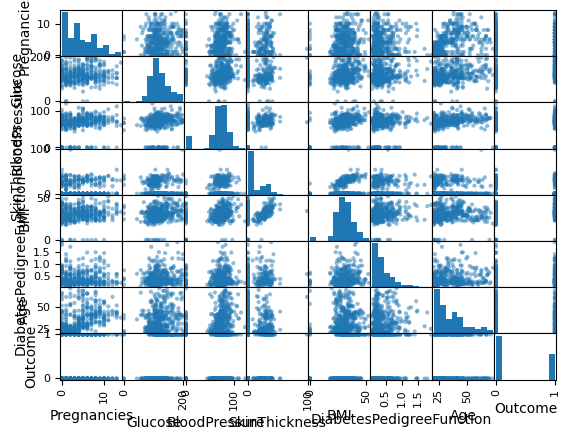

In [207]:
pd.plotting.scatter_matrix(first_df)
plt.show()

<Axes: xlabel='Glucose', ylabel='Outcome'>

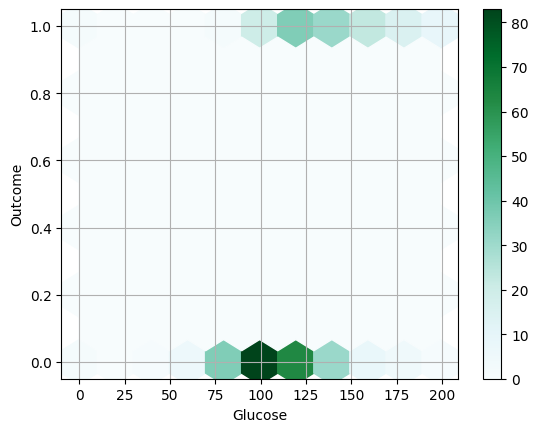

In [209]:
first_df.plot(x='Glucose', y='Outcome', kind='hexbin', gridsize=10, sharex=False, grid=True)

In [201]:
second_df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.201487,0.213740,0.095997,0.082171,-0.011282,-0.000402,0.680920,0.258846
Glucose,0.201487,1.000000,0.203356,0.203526,0.580010,0.208711,0.140409,0.346041,0.512201
BloodPressure,0.213740,0.203356,1.000000,0.232342,0.098272,0.301530,-0.020834,0.299845,0.192819
SkinThickness,0.095997,0.203526,0.232342,1.000000,0.184888,0.653425,0.154056,0.170694,0.257854
Insulin,0.082171,0.580010,0.098272,0.184888,1.000000,0.228328,0.130395,0.220261,0.303454
BMI,-0.011282,0.208711,0.301530,0.653425,0.228328,1.000000,0.112954,0.080778,0.271796
DiabetesPedigreeFunction,-0.000402,0.140409,-0.020834,0.154056,0.130395,0.112954,1.000000,0.076609,0.200759
Age,0.680920,0.346041,0.299845,0.170694,0.220261,0.080778,0.076609,1.000000,0.352982
Outcome,0.258846,0.512201,0.192819,0.257854,0.303454,0.271796,0.200759,0.352982,1.000000


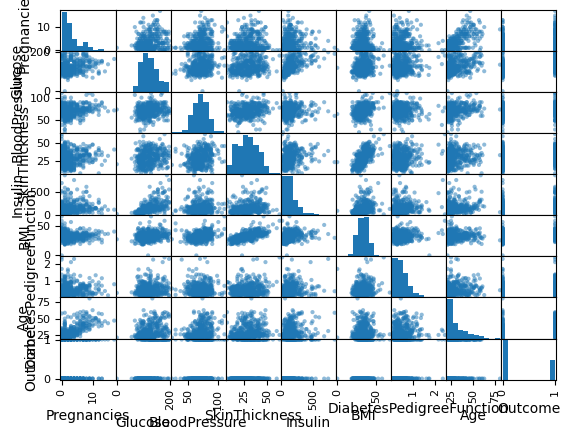

In [202]:
pd.plotting.scatter_matrix(second_df)
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Age'>

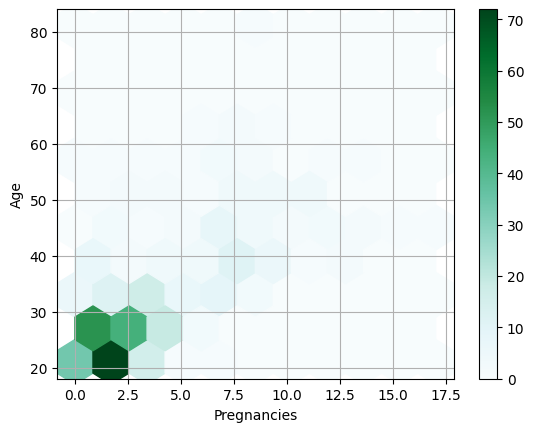

In [204]:
second_df.plot(x='Pregnancies', y='Age', kind='hexbin', gridsize=10, sharex=False, grid=True)

In [210]:
class CustomLogisticRegression:
    def __init__(self, lr, n_iters):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.normal(size=n_features)
        # self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_predicted]

In [225]:
data = first_df

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'],
    test_size=0.2, shuffle=True, random_state=42)

custom_model = CustomLogisticRegression(lr=0.1, n_iters=1000)
custom_model.fit(X_train, y_train)
custom_preds = custom_model.predict(X_test)

sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)
sk_preds = sk_model.predict(X_test)

custom_f1 = f1_score(y_test, custom_preds)
sklearn_f1 = f1_score(y_test, sk_preds)

print("F1-score (custom):", round(custom_f1, 4))
print("F1-score (sklearn):", round(sklearn_f1, 4))

F1-score (custom): 0.5567
F1-score (sklearn): 0.5333


In [241]:
data = second_df

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'],
    test_size=0.2, shuffle=True, random_state=42)

custom_model = CustomLogisticRegression(lr=0.1, n_iters=1000)
custom_model.fit(X_train, y_train)
custom_preds = custom_model.predict(X_test)

sk_model = LogisticRegression(max_iter=1000)
sk_model.fit(X_train, y_train)
sk_preds = sk_model.predict(X_test)

custom_f1 = f1_score(y_test, custom_preds)
sklearn_f1 = f1_score(y_test, sk_preds)

print("F1-score (custom):", round(custom_f1, 4))
print("F1-score (sklearn):", round(sklearn_f1, 4))

F1-score (custom): 0.5556
F1-score (sklearn): 0.6383
